In [76]:
import xarray as xr
import numpy as np

import sys
sys.path.append('..')
from wxdata.reanalysis import cfsr_6h_apply

In [2]:
def lat_avg_h5_hgt_anom(ds_url, min_lat, max_lat):
    ds = xr.open_dataset(ds_url)
    lat_band_h5 = ds['Geopotential_height_anomaly_isobaric'].sel(lat=slice(max_lat, min_lat), isobaric2=50000)
    return lat_band_h5.mean(dim='lat')

In [3]:
from functools import partial

may03anoms = cfsr_6h_apply('pgb', '2003-04-20 12:00', '2003-05-16 12:00', 
                      apply=partial(lat_avg_h5_hgt_anom, min_lat=40, max_lat=60),
                      timestep='12 hr')

In [4]:
ghgt_anom = xr.concat(may03anoms, dim='time')

In [5]:
ghgt_anom

<xarray.DataArray 'Geopotential_height_anomaly_isobaric' (time: 52, lon: 720)>
array([[-67.44191 , -64.891182, -62.250698, ..., -72.987282, -71.55117 ,
        -69.596054],
       [-33.693413, -28.619761, -23.920246, ..., -50.01878 , -44.413898,
        -38.91732 ],
       [  3.688046,   9.753417,  15.383658, ..., -16.01634 ,  -9.193414,
         -2.557805],
       ..., 
       [-24.808044, -29.171949, -33.386581, ..., -10.912444, -15.497806,
        -20.158287],
       [-10.997563, -14.581949, -18.34    , ...,  -1.02878 ,  -4.062929,
         -7.407315],
       [-16.737562, -18.263412, -20.005852, ..., -13.739512, -14.345364,
        -15.302923]], dtype=float32)
Coordinates:
  * lon        (lon) float32 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 ...
    isobaric2  float32 50000.0
    reftime    (time) datetime64[ns] 2003-04-20T12:00:00 2003-04-21 ...
  * time       (time) datetime64[ns] 2003-04-20T12:00:00 2003-04-21 ...

Text(0.5,0.98,'500mb Geopotential Height Anomalies averaged between 40°N-60°N, April-May 2003')

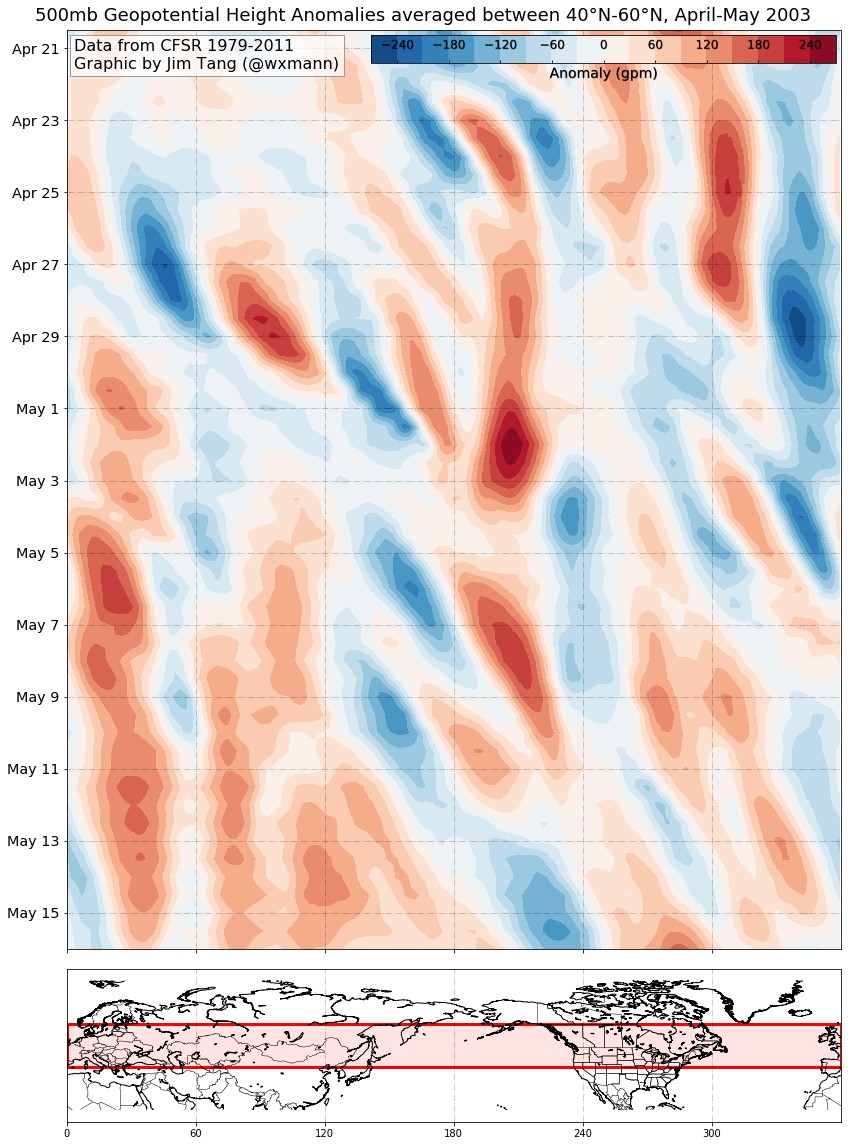

In [170]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Polygon
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patheffects as path_effects

from wxdata.plotting import simple_basemap, top_left_textbox

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 16), 
                               gridspec_kw=dict(height_ratios=[6, 1]))

hovmoller = ghgt_anom.plot.contourf(yincrease=False, levels=20, center=0, ax=ax1,
                                   add_colorbar=False, add_labels=False)
basemap = simple_basemap(bbox=(0, 360, 20, 80), proj='cyl', resolution='l', ax=ax2, us_detail=False)

plt.tight_layout()
fig.subplots_adjust(top=0.96)
# cbar_ax = fig.add_axes([0.95, 0.55, 0.03, 0.4])
cbar_ax = inset_axes(ax1, width="60%", height="3%", loc=1)
cbar = fig.colorbar(hovmoller, cax=cbar_ax, orientation='horizontal')
cbar.ax.xaxis.set_tick_params(which='major', direction='in')

text_shadow = path_effects.withSimplePatchShadow(offset=(0.5, -0.5), alpha=0.6, shadow_rgbFace='black')
plt.setp(plt.getp(cbar.ax.axes, 'xticklabels'), color='black', size='large', y=1.0,
        path_effects=[text_shadow])
cbar.set_label('Anomaly (gpm)', color='black', path_effects=[text_shadow], fontsize=14)

top_left_textbox(ax1, 'Data from CFSR 1979-2011\nGraphic by Jim Tang (@wxmann)')

ax1.tick_params(labelsize='x-large')
ax1.xaxis.set_ticks(np.arange(0, 360, 60))
ax1.grid(color='k', linestyle='-.', linewidth=1, alpha=0.2)
ax2.grid(color='k', linestyle='-.', linewidth=1, alpha=0.2)
ax1.yaxis.set_major_locator(dates.DayLocator(interval=2))
ax1.yaxis.set_major_formatter(dates.DateFormatter('%b %-d'))

x1,y1 = basemap(0, 40)
x2,y2 = basemap(0, 60)
x3,y3 = basemap(360, 60)
x4,y4 = basemap(360, 40)
lat_box = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)], facecolor='mistyrose', edgecolor='red',linewidth=3)
ax2.add_patch(lat_box)

plt.suptitle('500mb Geopotential Height Anomalies averaged between 40°N-60°N, April-May 2003', 
             fontsize=18)